當前工作目錄 ==> /home/jovyan/SSNP3D/0_dir
19296
19296
19296
zValue < 0 筆數有 407
---------------------
array([176240, 176260, 176280, 176300, 176320, 176340, 176360, 176380,
       176400, 176420], dtype=int32)
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)
array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0], dtype=int32)
Done


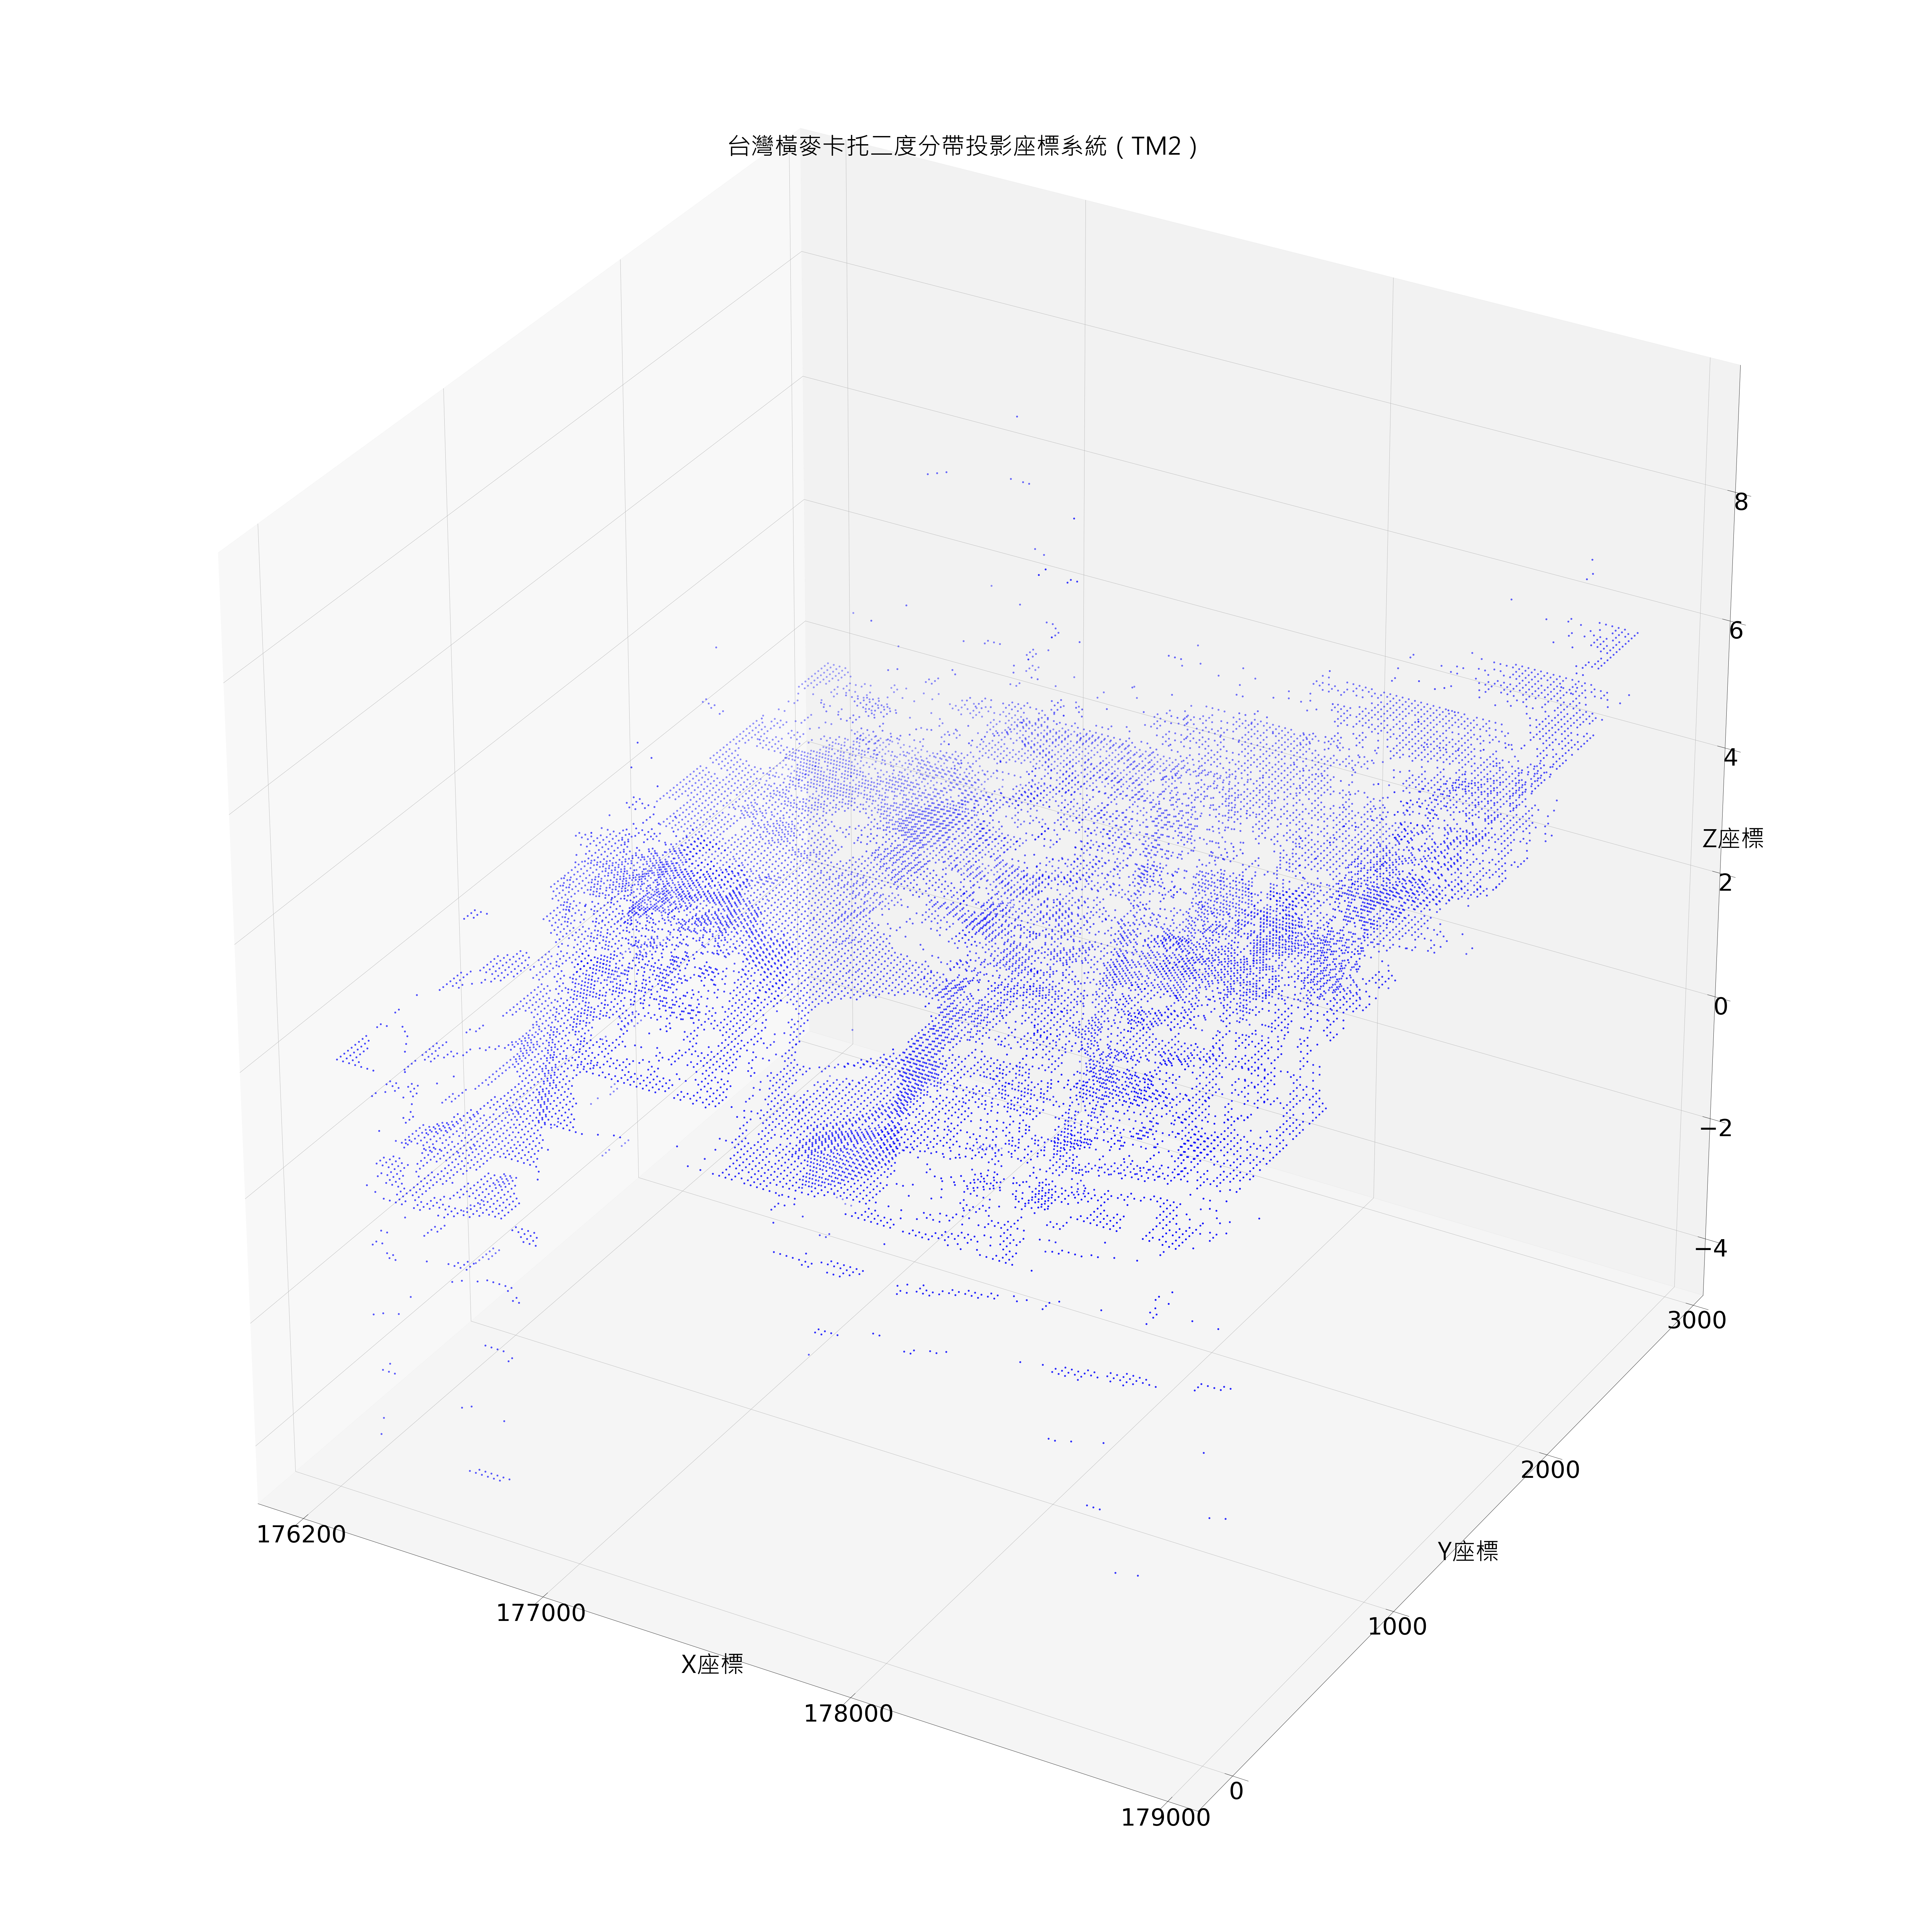

In [1]:
# SSNP-00.py
# 2021-11-14
#
# plot 3D scatter point clouds
#
# run on mybinder.org
# 程式檔 path is './0_dir'
# 資料檔 path is './1_dir'
# 圖形檔 path is './2_dir'
#
import os
path = os.getcwd()
print('當前工作目錄 ==>', path)
#
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontManager
#
from pprint import pprint
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 2.0   # cm
    right_margin = 2.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 2.0    # cm
    bottom_margin = 2.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
matplotlib.rcParams['pdf.fonttype'] = 42
myfont = fontManager.FontProperties(fname='/home/jovyan/fonts/msjh.ttc')
# ----------------------------------------------------------------------
#
tup7 = set_graphic_area(200,200)
# tup7 = set_graphic_area(30,30)
#
fig = plt.figure(figsize=(tup7[0], tup7[1]))
ax  = fig.add_subplot(1, 1, 1, projection='3d')
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
xvalues = [176200, 177000, 178000, 179000]
yvalues = [0, 1000, 2000, 3000]
# yvalues = [2500000, 2501000, 2502000, 2503000]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=70)
#
ax.set_xlabel('X座標', fontproperties=myfont, fontsize=70)
ax.set_ylabel('Y座標', fontproperties=myfont, fontsize=70)
ax.set_zlabel('Z座標', fontproperties=myfont, fontsize=70)
#
path_data    = './data/'
path_graphic = './graphic/'
#
# 逐筆讀入資料 1-94182051dem.grd (13247 row)
# Read from the file into the array data(:,:)
# array data shape is (13247, 3)
# 13247 rows, 3 columns
#
data_1 = np.loadtxt(path_data + '2-94182052dem.grd',delimiter=' ',dtype='float')
#
function_float_convertTo_int = np.vectorize(np.int32)
#
# for numpy -->  data[..., 1] 等價于 data[:, 1]
# for columns:
# data[..., 0] is array of float number  # 二度分帶 X座標
# data[..., 1] is array of float number  # 二度分帶 Y座標
#
# 台灣橫麥卡托二度分帶投影座標系統（TM2）
#
TM2_X = function_float_convertTo_int(data_1[..., 0]) # 二度分帶 X座標
TM2_Y = function_float_convertTo_int(data_1[..., 1]) # 二度分帶 Y座標
TM2_Z = data_1[..., 2] # DEM file z value
#
j = 0
for zValue in TM2_Z :
    if zValue < 0 :
        j = j + 1
    # end if
# end for
#
print (TM2_X.size) # 13247
print (TM2_Y.size) # 13247
print (TM2_Z.size) # 13247
print ('zValue < 0 筆數有',j)
print('---------------------')
#
# round( x [, n]  )
#        x -- 數值表達式
#        n -- 表示從小數點位數
#
new_TM2_Y = []
for y in TM2_Y :
    new_TM2_Y.append(y - 2499920)
#
TM2_Y = np.array(new_TM2_Y, dtype='int32')
# 串列生成式
TM2_Z_list = [round(z*1.5,2) for z in TM2_Z]
tm2_z = np.array(list(TM2_Z_list), dtype='int32')
#
pprint(TM2_X[0:10])
pprint(TM2_Y[0:10])
pprint(tm2_z[0:10])
#
# plot a 3D trisurf
# ax.plot_trisurf(TM2_X, TM2_Y, tm2_z, linewidth=0, antialiased=False)
#
# plot a 3D Points Cloud
ax.scatter(TM2_X, TM2_Y, tm2_z, marker='o', color='blue')
#
# 設定子圖的標題
ax.set_title('台灣橫麥卡托二度分帶投影座標系統（TM2）', fontproperties=myfont, fontsize=70)
#
# bbox_inches='tight' is for display ylabel
# plt.savefig(path_graphic + "Hipparcos-02.png",format="png",dpi=72, bbox_inches='tight')
plt.savefig(path_graphic + "SSNP-01.pdf", dpi=300, bbox_inches='tight')
#
print ('Done')